mosborne
lprior

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rand(r, c):
    x = np.random.rand(r, c)
    return(x)

In [2]:
rand(4,3)

array([[ 0.94302028,  0.72739592,  0.26610613],
       [ 0.30739912,  0.76186855,  0.71702219],
       [ 0.47004893,  0.92993053,  0.51195249],
       [ 0.44568611,  0.76904812,  0.7267404 ]])

In [64]:
def sequ(r, c):
    x = r*c
    y = np.arange(0, x, dtype=np.float).reshape(4,3)
    return (y)

In [65]:
sequ(4,3)

array([[  0.,   1.,   2.],
       [  3.,   4.,   5.],
       [  6.,   7.,   8.],
       [  9.,  10.,  11.]])

In [62]:
def n_size(n):
    x = np.full((1,n), np.linspace(0, 1, n))
    if ((1, n) != x.shape):
        return (0)
    return (x)

In [63]:
n_size(5)

array([[ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]])

In [7]:
def extract(n):
    x = np.arange(0, 120, dtype=np.float).reshape(10, 12)
    x = x[0:5, 7:12]
    return (x)

In [8]:
extract(120)

array([[  7.,   8.,   9.,  10.,  11.],
       [ 19.,  20.,  21.,  22.,  23.],
       [ 31.,  32.,  33.,  34.,  35.],
       [ 43.,  44.,  45.,  46.,  47.],
       [ 55.,  56.,  57.,  58.,  59.]])

In [9]:
def matplot(m, n):
    x = np.full((m, n), n_size(n))
    np.matrix(x)
    return(plt.imshow(x))

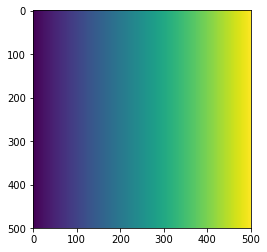

In [10]:
matplot(500, 500)

In [11]:
def img(m, n):
    img = plt.imread('mgfm.png')
    color = np.full((m, n), n_size(n))
    for i in range(0,4):
        img[:,:,i] *= color
    plt.imshow(img)

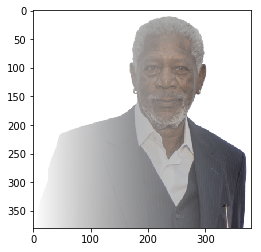

In [12]:
img(380, 380)

In [59]:
# Helper Functions ####################################

def img_process(im, h=10, **kwargs):
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off')
    
def rgb_split(x):
    r = x[:,:, 0]
    g = x[:,:, 1]
    b = x[:,:, 2]
    return r, g, b

def adjust_rgb(channel, value):
    og = channel.shape
    flat_channel = channel.flatten()
    adjust = np.interp(flat_channel, np.linspace(0, 1, len(value)), value)
    return adjust.reshape(og)

def circle_mask(m, n):
    mask = np.ones((m, n))
    for y in range(0, m):
        for x in range(0, n):
            mask[y][x] *= np.sin(np.pi*(x/n)) * np.sin(np.pi*(y/m))
            
    return (mask)
    
# Required Filter ####################################


def amaro():
    img = plt.imread('mgfm.png')
    cirl = circle_mask(380,380)
    for i in range(0,4):
        img[:,:,i] *= cirl
    r, g, b = rgb_split(img)
    new_r = adjust_rgb(r, [.1, .9, 1])
    new_g = adjust_rgb(g, [.1, .9, 1])
    new_b = adjust_rgb(b, [.1, .9, 1])
    amaro = np.stack([new_r, new_g, new_b], axis=2)
    plt.imshow(amaro)
    
def mayfair():
    img = plt.imread('mgfm.png')
    cirl = circle_mask(380,380)
    for i in range(0,4):
        img[:,:,i] *= cirl
    r, g, b = rgb_split(img)
    new_r = adjust_rgb(r, [0, 0.4, 0.9, 1])
    new_g = adjust_rgb(g, [0, 0.35, 0.95, 1])
    new_b = adjust_rgb(b, [0, 0.43, 0.9, 1])
    mayfair = np.stack([new_r, new_g, new_b], axis=2)
    plt.imshow(mayfair)
    
def sutro():
    x = plt.imread('mgfm.png')
    r, g, b = rgb_split(x)
    new_r = adjust_rgb(r, [0, 0.75, 1])
    new_g = adjust_rgb(g, [0, 0.6, 1])
    new_b = adjust_rgb(b, [0, .6, 1])
    sutro = np.stack([new_r, new_g, new_b], axis=2)
    img_process(sutro)

def hudson():
    x = plt.imread('mgfm.png')
    r, g, b = rgb_split(x)
    new_r = adjust_rgb(r, [0, 0.4, 1])
    new_g = adjust_rgb(g, [0, 0.3, 1])
    new_b = adjust_rgb(b, [0, 0.4, 1])
    hudson = np.stack([new_r, new_g, new_b], axis=2)
    img_process(hudson)
    
    
# Extra Filters ######################################


def trippy():
    x = plt.imread('mgfm.png')
    r, g, b = rgb_split(x)
    new_r = adjust_rgb(r, [0, .9, 250])
    new_g = adjust_rgb(g, [0, .9, 250])
    new_b = adjust_rgb(b, [0, .9, 250])
    trippy = np.stack([new_r, new_g, new_b], axis=2)
    img_process(trippy)

def gotham():
    x = plt.imread('mgfm.png')
    r, g, b = rgb_split(x)
    new_r = adjust_rgb(r, [0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0])
    new_b = np.clip(adjust_rgb(b, [0, 0.047, 0.118, 0.251, 0.318, 0.392, 0.42, 0.439, 0.475, 0.561, 0.58, 0.627, 0.671, 0.733, 0.847, 0.925, 1]) + 0.03, 0, 1.0)
    gotham = np.stack([new_r, g, new_b], axis=2)
    img_process(gotham)

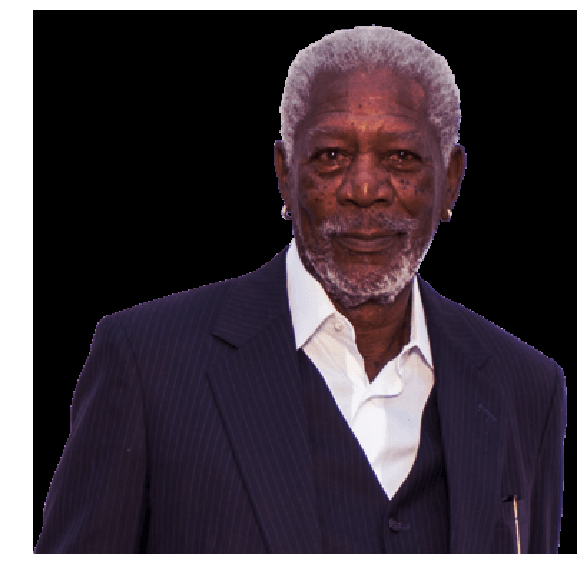

In [60]:
hudson()

mayfair()

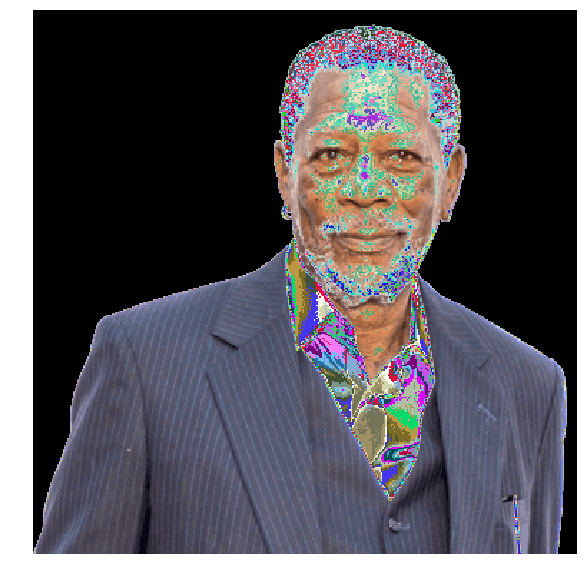

In [21]:
trippy()

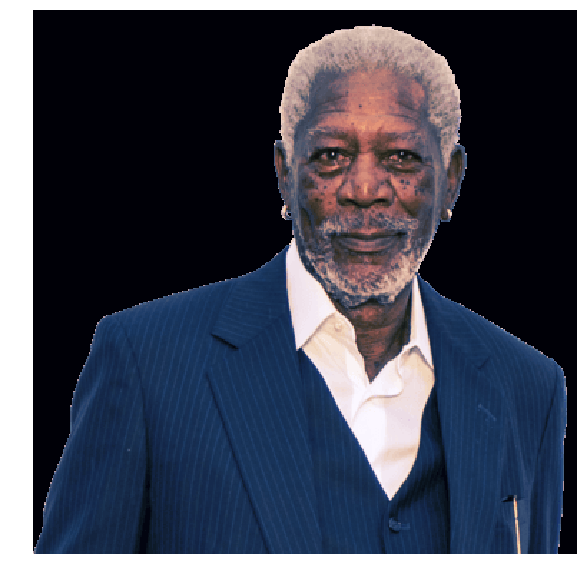

In [22]:
gotham()

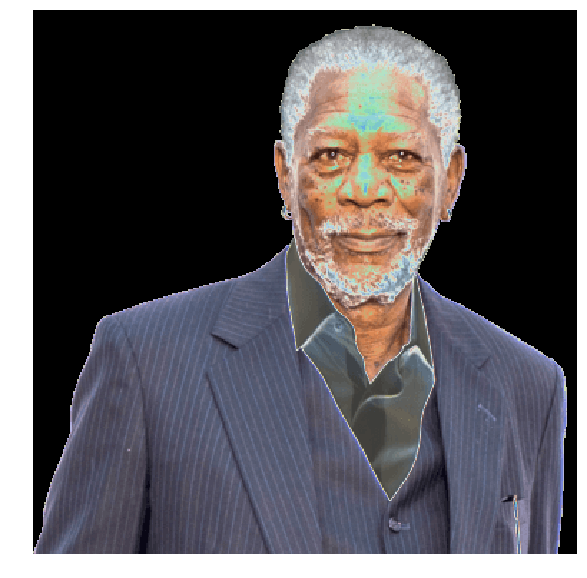

In [23]:
valencia()